In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\global_economy.csv"

df = pd.read_csv(path)
df.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [3]:
df['GDP_per_capita'] = df['GDP'] / df['Population']
df.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,GDP_per_capita
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0,59.777327
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0,59.878153
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0,58.492874
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0,78.782758
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0,82.208444


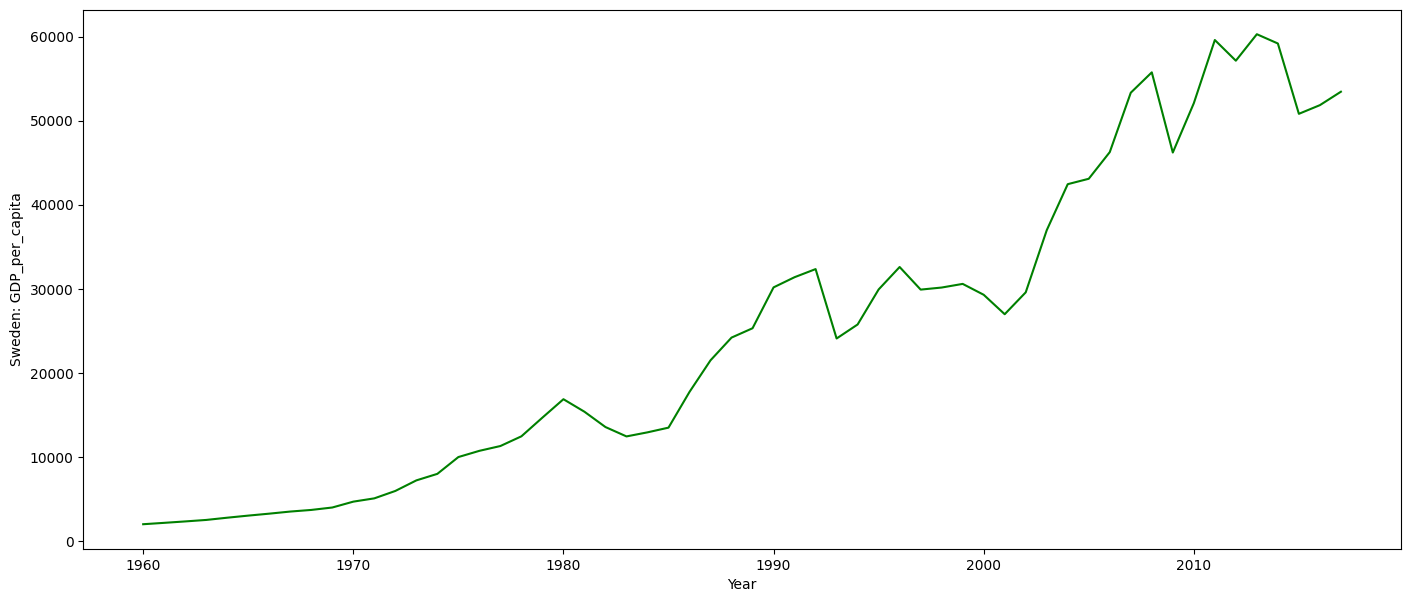

In [4]:
sw = df[df['Country']=='Sweden']
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(sw['Year'], sw['GDP_per_capita'], c='green')
ax.set_xlabel('Year')
ax.set_ylabel('Sweden: GDP_per_capita')
plt.show()

Predictions Summary:
           mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  56165.505606  1324.719448   53511.773667   58819.237546  45843.816975   
1  57225.849357  1358.823339   54503.799115   59947.899599  46886.385129   
2  58286.193107  1393.187266   55495.303647   61077.082567  47928.392811   

   obs_ci_upper  
0  66487.194238  
1  67565.313585  
2  68643.993403  
            GDP_per_capita      lower_80      upper_80      lower_95  \
2018-12-31    56165.505606  45843.816975  66487.194238  45843.816975   
2019-12-31    57225.849357  46886.385129  67565.313585  46886.385129   
2020-12-31    58286.193107  47928.392811  68643.993403  47928.392811   

                upper_95  
2018-12-31  66487.194238  
2019-12-31  67565.313585  
2020-12-31  68643.993403  


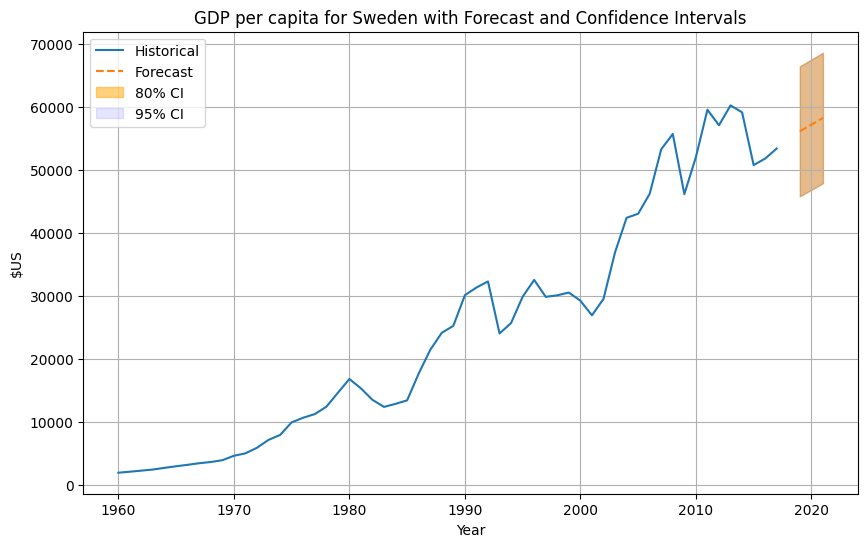

In [5]:
import statsmodels.api as sm

# Supongamos que df es tu DataFrame original que contiene datos de diferentes países
# Filtrar los datos para Suecia usando .loc para evitar SettingWithCopyWarning
sweden_data = df.loc[df['Country'] == 'Sweden'].copy()

# Convertir la columna 'Year' en un formato datetime y establecerla como el índice
sweden_data['Year'] = pd.to_datetime(sweden_data['Year'], format='%Y')
sweden_data.set_index('Year', inplace=True)

# Crear una variable de tendencia
sweden_data['trend'] = range(1, len(sweden_data) + 1)

# Definir las variables dependiente (GDP_per_capita) e independiente (trend)
X = sm.add_constant(sweden_data['trend'])  # Agregar el intercepto
y = sweden_data['GDP_per_capita']

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Pronóstico para los próximos 3 años (suponiendo datos anuales)
forecast_horizon = 3
future_trend = np.arange(len(sweden_data) + 1, len(sweden_data) + forecast_horizon + 1)

# Generar predicciones con intervalos de confianza del 80% y 95%
X_future = sm.add_constant(future_trend)  # Agregar la constante también al futuro
predictions_summary = model.get_prediction(X_future).summary_frame()

# Verificar que predictions_summary tiene los datos necesarios
print("Predictions Summary:")
print(predictions_summary)

# Crear DataFrame para las predicciones y añadir las fechas correspondientes
last_date = sweden_data.index[-1]
future_years = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=forecast_horizon, freq='YE')

# Crear el DataFrame con las predicciones sin especificar el índice
forecast_df = pd.DataFrame({
    'GDP_per_capita': predictions_summary['mean'],
    'lower_80': predictions_summary['obs_ci_lower'],
    'upper_80': predictions_summary['obs_ci_upper'],
    'lower_95': predictions_summary['obs_ci_lower'],
    'upper_95': predictions_summary['obs_ci_upper']
})

# Asegúrate de que las longitudes coincidan
forecast_df.index = future_years

# Imprimir forecast_df para verificar que contenga valores
print(forecast_df)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los datos históricos
plt.plot(sweden_data.index, sweden_data['GDP_per_capita'], label="Historical")

# Graficar las predicciones y los intervalos de confianza
plt.plot(forecast_df.index, forecast_df['GDP_per_capita'], label="Forecast", linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['lower_80'], forecast_df['upper_80'], color='orange', alpha=0.5, label="80% CI")
plt.fill_between(forecast_df.index, forecast_df['lower_95'], forecast_df['upper_95'], color='blue', alpha=0.1, label="95% CI")

# Personalizar el gráfico
plt.title("GDP per capita for Sweden with Forecast and Confidence Intervals")
plt.ylabel("$US")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
path2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"

ausp = pd.read_csv(path2)
ausp.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5


In [43]:
ausp['year'] = ausp['Quarter'].str[:4].astype(int)

# Función para convertir el trimestre en la fecha del primer día del último mes del trimestre
def quarter_to_date(quarter):
    year, q = quarter.split()
    month = {'Q1': '03', 'Q2': '06', 'Q3': '09', 'Q4': '12'}[q]
    return f'01-{month}-{year}'

# Crear la columna 'date' con el primer día del último mes del trimestre
ausp['date'] = ausp['Quarter'].apply(quarter_to_date)
ausp['date'] = pd.to_datetime(ausp['date'])
ausp.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,year,date
0,1956 Q1,284,5225.0,189.0,465,3923,5,1956,1956-01-03
1,1956 Q2,213,5178.0,204.0,532,4436,6,1956,1956-01-06
2,1956 Q3,227,5297.0,208.0,561,4806,7,1956,1956-01-09
3,1956 Q4,308,5681.0,197.0,570,4418,6,1956,1956-01-12
4,1957 Q1,262,5577.0,187.0,529,4339,5,1957,1957-01-03


In [44]:
ausp_2 = ausp[(ausp['year']>=1970) & (ausp['year']<=2004)]
ausp_2.set_index('date', inplace=True) 
ausp_2['Quarter'].value_counts()

Quarter
1970 Q1    1
1994 Q1    1
1992 Q3    1
1992 Q4    1
1993 Q1    1
          ..
1980 Q1    1
1979 Q4    1
1979 Q3    1
1979 Q2    1
2004 Q4    1
Name: count, Length: 140, dtype: int64

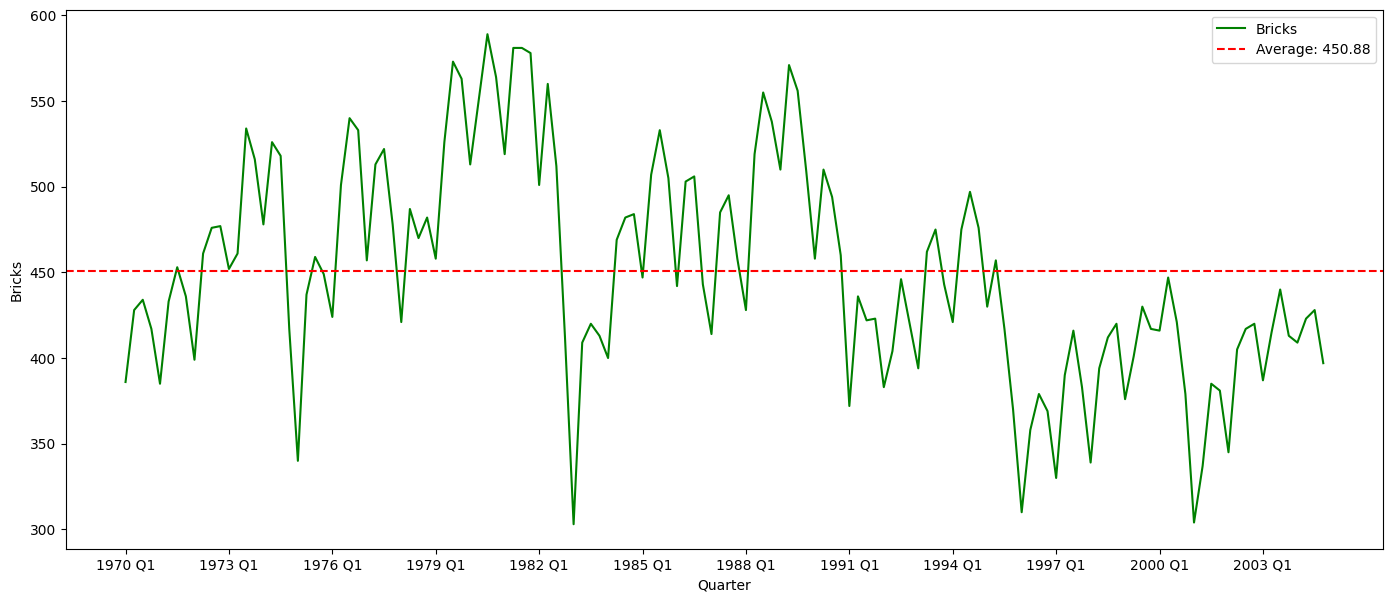

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(17, 7))

# Graficar los datos de Bricks
ax.plot(ausp_2['Quarter'], ausp_2['Bricks'], c='green', label='Bricks')

# Calcular y graficar el promedio de Bricks
mean_bricks = ausp_2['Bricks'].mean()
ax.axhline(mean_bricks, color='red', linestyle='--', label=f'Average: {mean_bricks:.2f}')

step = 12
x_ticks = range(0, len(ausp_2['Quarter']), step)
ax.set_xticks(x_ticks)

# Etiquetas y leyenda
ax.set_xlabel('Quarter')
ax.set_ylabel('Bricks')
ax.legend()

plt.show()

In [46]:
ausp_2.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,year
date,,,,,,,,
1970-01-03,1970 Q1,387,6807.0,386.0,1049,12328,12,1970
1970-01-06,1970 Q2,357,7612.0,428.0,1134,14493,18,1970
1970-01-09,1970 Q3,374,7862.0,434.0,1229,15664,23,1970
1970-01-12,1970 Q4,466,7126.0,417.0,1188,13781,20,1970
1971-01-03,1971 Q1,410,7255.0,385.0,1058,13299,19,1971


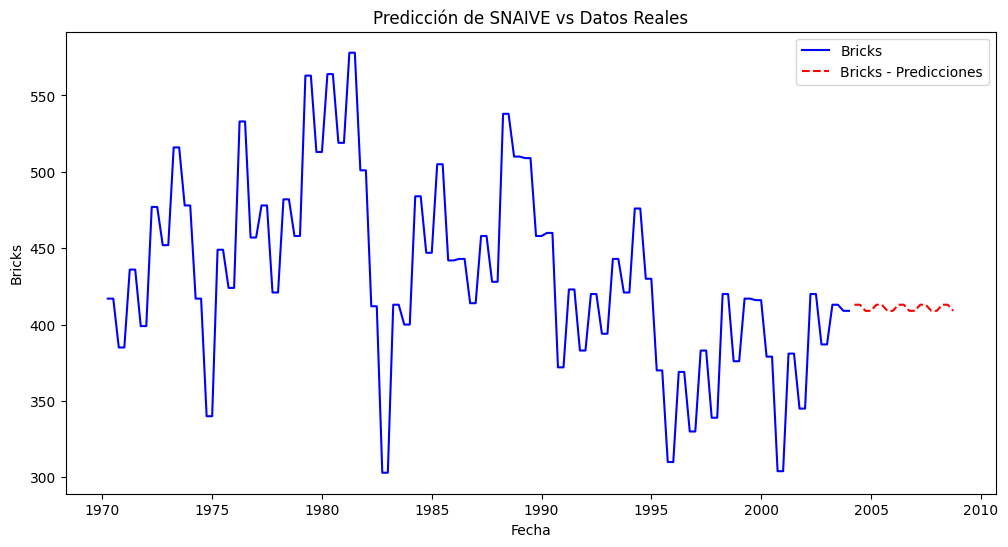

In [61]:
from sktime.forecasting.naive import NaiveForecaster

y = ausp_2['Bricks'].asfreq('QE', method='nearest') 

forecaster = NaiveForecaster(strategy="last", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh=[i for i in range(1, 20)])

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label="Bricks", color="blue")
plt.plot(y_pred.index, y_pred, label="Bricks - Predicciones", color="red", linestyle="--")
plt.xlabel("Fecha")
plt.ylabel("Bricks")
plt.title("Predicción de SNAIVE vs Datos Reales")
plt.legend()
plt.show()

In [42]:
import pandas as pd
path_aus_production= r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"

aus_production = pd.read_csv(path_aus_production)

aus_production['year'] = aus_production['Quarter'].str[:4].astype(int)

# Función para convertir el trimestre en la fecha del primer día del último mes del trimestre
def quarter_to_date(quarter):
    year, q = quarter.split()
    month = {'Q1': '03', 'Q2': '06', 'Q3': '09', 'Q4': '12'}[q]
    return f'01-{month}-{year}'

# Crear la columna 'date' con el primer día del último mes del trimestre
aus_production['date'] = aus_production['Quarter'].apply(quarter_to_date)
aus_production['date'] = pd.to_datetime(aus_production['date'])

aus_production = aus_production[(aus_production['year']>=1992) & (aus_production['year']<=2006)]
aus_production.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,year,date
144,1992 Q1,443,5777.0,383.0,1289,38332,117,1992,1992-01-03


In [32]:
aus_production = aus_production.set_index('date')
forecast_start_date = aus_production.index[-1] + pd.DateOffset(months=3)
forecast_start_date

Timestamp('2006-04-12 00:00:00')

C:\Users\HP\AppData\Local\Temp\ipykernel_23872\3510865621.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  }, index=pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='Q'))


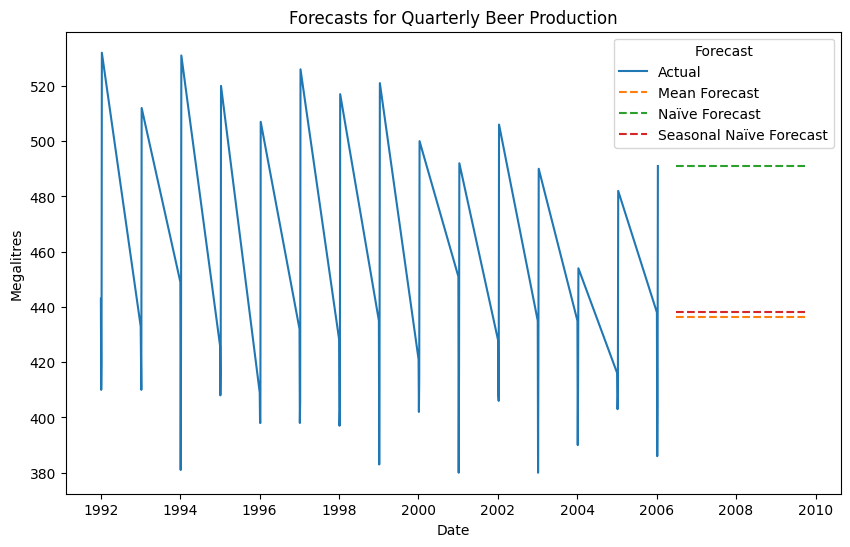

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.naive import NaiveForecaster

# Asumimos que `train` es tu conjunto de datos de entrenamiento
# Define el periodo estacional para la producción trimestral (4 trimestres = 1 año)
seasonal_period = 4
forecast_horizon = 14

# Ajuste de modelos
mean_forecast_value = np.mean(aus_production['Beer'])
naive_forecast_value = aus_production['Beer'].iloc[-1]  # último valor observado
seasonal_naive_forecast_value = aus_production['Beer'].iloc[-seasonal_period]  # valor de hace un año

# # Crear DataFrame para almacenar pronósticos
forecast_df = pd.DataFrame({
    'Mean': [mean_forecast_value] * forecast_horizon,
    'Naïve': [naive_forecast_value] * forecast_horizon,
    'Seasonal naïve': [seasonal_naive_forecast_value] * forecast_horizon
}, index=pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='Q'))


# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(aus_production.index, aus_production['Beer'], label="Actual")
plt.plot(forecast_df.index, forecast_df['Mean'], label="Mean Forecast", linestyle='--')
plt.plot(forecast_df.index, forecast_df['Naïve'], label="Naïve Forecast", linestyle='--')
plt.plot(forecast_df.index, forecast_df['Seasonal naïve'], label="Seasonal Naïve Forecast", linestyle='--')

# Agregar detalles del gráfico
plt.xlabel("Date")
plt.ylabel("Megalitres")
plt.title("Forecasts for Quarterly Beer Production")
plt.legend(title="Forecast")
plt.show()


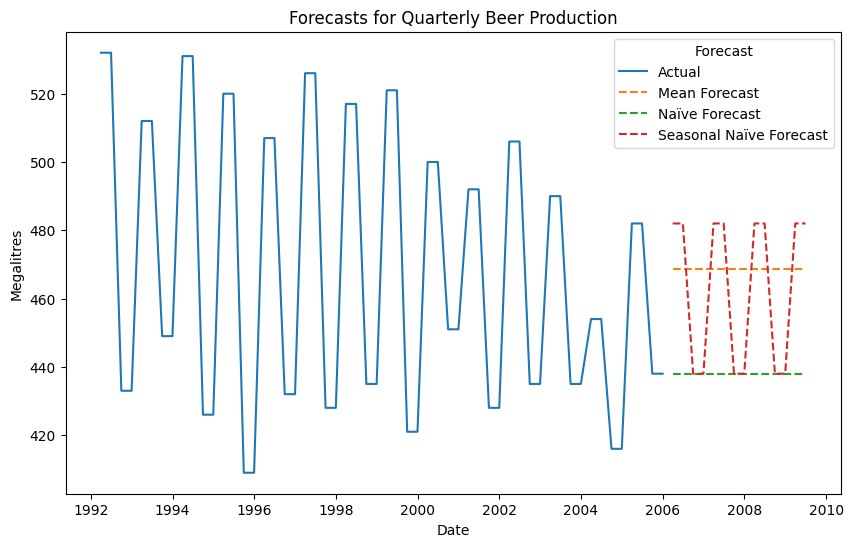

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.naive import NaiveForecaster

# Asegurarse de que la columna 'date' esté en formato datetime y establecerla como índice
aus_production['date'] = pd.to_datetime(aus_production['date'])
aus_production = aus_production.set_index('date')

# Establecer la frecuencia del índice en trimestral ('Q') si no tiene una frecuencia
if aus_production.index.freq is None:
    aus_production = aus_production.asfreq('QE', method='nearest') 

# Definir el periodo estacional y el horizonte de pronóstico
seasonal_period = 4  # Trimestral
forecast_horizon = 14

# Ajuste de modelos básicos
mean_forecast_value = np.mean(aus_production['Beer'])
naive_forecast_value = aus_production['Beer'].iloc[-1]  # último valor observado

# Crear y ajustar el NaiveForecaster para la estacionalidad
seasonal_forecaster = NaiveForecaster(strategy="last", sp=seasonal_period)
seasonal_forecaster.fit(aus_production['Beer'])
seasonal_naive_forecast = seasonal_forecaster.predict(fh=np.arange(1, forecast_horizon + 1))

# Crear DataFrame para almacenar pronósticos
forecast_start_date = aus_production.index[-1] + pd.DateOffset(months=3)
forecast_df = pd.DataFrame({
    'Mean': [mean_forecast_value] * forecast_horizon,
    'Naïve': [naive_forecast_value] * forecast_horizon,
    'Seasonal naïve': seasonal_naive_forecast.values
}, index=pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='QE'))

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(aus_production.index, aus_production['Beer'], label="Actual")
plt.plot(forecast_df.index, forecast_df['Mean'], label="Mean Forecast", linestyle='--')
plt.plot(forecast_df.index, forecast_df['Naïve'], label="Naïve Forecast", linestyle='--')
plt.plot(forecast_df.index, forecast_df['Seasonal naïve'], label="Seasonal Naïve Forecast", linestyle='--')

# Agregar detalles del gráfico
plt.xlabel("Date")
plt.ylabel("Megalitres")
plt.title("Forecasts for Quarterly Beer Production")
plt.legend(title="Forecast")
plt.show()


In [121]:
path3 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\gafa_stock.csv"

stocks = pd.read_csv(path3)
google = stocks[stocks['Symbol']=='GOOG'].reset_index(drop=True)
google.head(1)

,Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
0,GOOG,2014-01-02,554.125916,555.26355,550.549194,552.963501,552.963501,3666400


In [122]:
google['date'] = pd.to_datetime(google['Date'])
google.drop(columns='Date', inplace=True)
google['year'] = google['date'].dt.year
google['day'] = google['date'].dt.dayofyear
google.head(1)

,Symbol,Open,High,Low,Close,Adj_Close,Volume,date,year,day
0,GOOG,554.125916,555.26355,550.549194,552.963501,552.963501,3666400,2014-01-02,2014,2


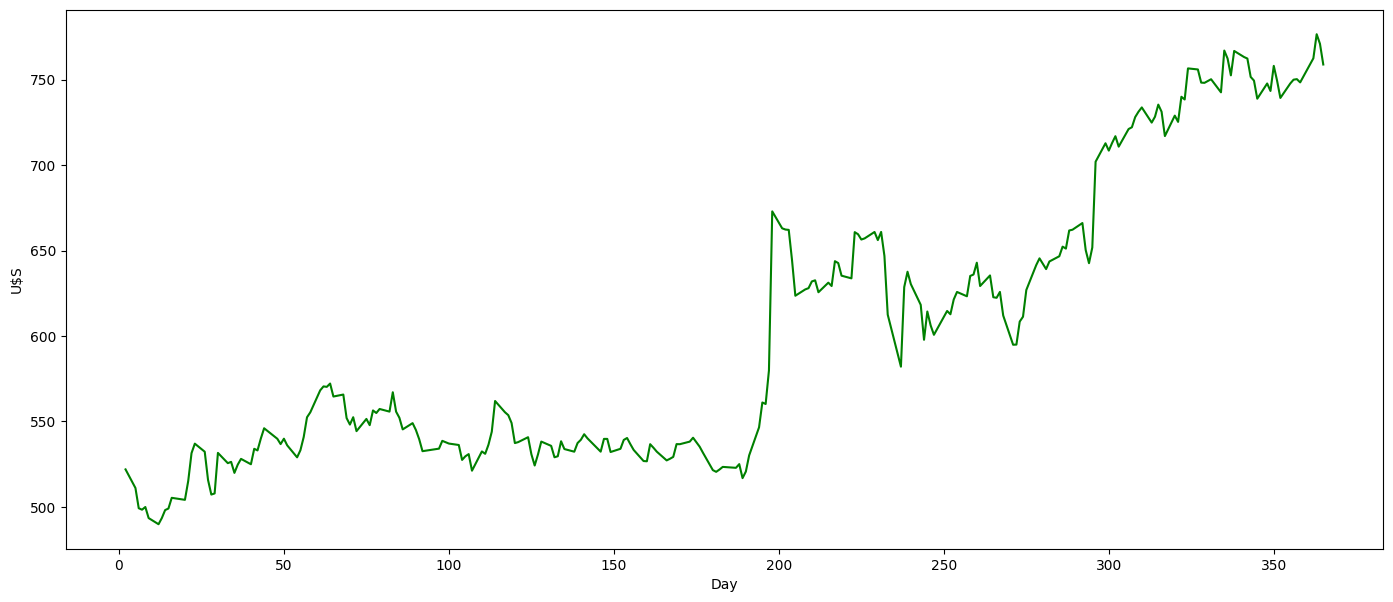

In [123]:
google_15 = google[google['year']==2015]
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(google_15['day'], google_15['Close'], c='green')
ax.set_xlabel('Day')
ax.set_ylabel('U$S')
plt.show()

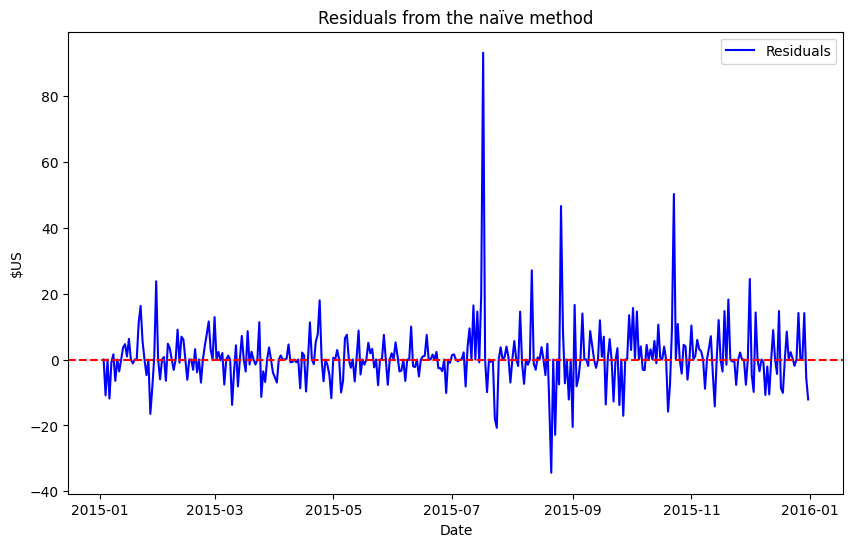

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

google_15 = google_15.set_index('date')
google_15 = google_15.asfreq('D', method='nearest')

# Crear el NaiveForecaster
naive_forecaster = NaiveForecaster(strategy="last", sp=365)  # sp=1 para la previsión naive
naive_forecaster.fit(google_15['Close'])

# Realizar predicciones y calcular residuos
forecast_horizon = len(google_15)  # Para predecir todo el rango de datos
predictions = naive_forecaster.predict(fh=np.arange(1, forecast_horizon + 1))

# Calcular residuos
residuals = google_15['Close'].values - predictions.values

# Crear DataFrame de residuos
aug = pd.DataFrame({'residuals': residuals}, index=google_15.index)

# Graficar residuos
plt.figure(figsize=(10, 6))
plt.plot(aug.index, aug['residuals'], label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('Date')
plt.ylabel('$US')
plt.title('Residuals from the naïve method')
plt.legend()
plt.show()